<img src="https://images.efollett.com/htmlroot/images/templates/storeLogos/CA/864.gif" style="float: right;"> 




# ECON628-01 
## Project 1 - Dino Carlo A. Saplala

## Requirements

1. You need to perform an exhaustive exploration of your dataset.
2. Your code must show command and understanding of Python (Codeacademy and class 1,2,3 notes)
3. You need to define functions (no matter how complicated they are)
4. You don't need to do any modeling

    1. Load and clean, if neccessary, the data with pandas.
    2. Describe the data and investigate any outliers.
    3. Explore relationships between the variables.
    4. Visualize at least five variables of your choice with appropriate visualizations. They should be readable.
    5. Visualize subsets of the variables you chose, subsetted conditional on some other variable. 

5. Write a brief report on at least 5 things you found interesting about the data or, if it doesn't interest you at all, things you found out and why they are boring.

## The Relationship between International Trade, Financial Development, and Economic Growth in the Philippines

This dataset was used for the MA Economics Thesis proposal draft of Dino Carlo A. Saplala at Ateneo de Manila University. The following time series variables covering annual Philippine data from 1960-2014 were collected from the World Development Indicators and Financial Development & Structure online datasets of the World Bank:

    RealGDP: Gross Domestic Product in constant local currency units
    GrossKformation: Gross Capital Formation in constant local currency units
    population: annual population estimates
    Trade Openness: Trade to GDP ratio, a common indicator of a country's openness to trade
    BanksCreditperGDP: Private Credit by Deposit Money Banks to GDP ratio
    BanksFICreditperGDP: Private Credit by Deposit Money Banks and Other Financial Institutions to GDP ratio
    RExports: Exports of goods and services in constant local currency units
    RImports: Imports of goods and services in constant local currency units

All variables with monetary units are expressed in Philippine pesos.

In [42]:
# Format of importing data modules adapted from 1.3-full-analysis.ipynb file
# data modules
import numpy as np
import scipy.stats as stats
import pandas as pd

# plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Stats/Regresions Packages
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# make sure charts appear in the notebook:
%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [43]:
'''
Load the dataset DinoSaplala_Project1data.csv inside the project1 folder
in the datasets folder of the ECON628-01-dsaplala depository
'''
df = pd.read_csv("/Users/dino/Desktop/ECON628-01-dsaplala/datasets/project1/DinoSaplala_Project1data.csv")

In [44]:
'''
Excluding the "Year" series, the dataset currently has 8 variables and covers 55 years
from 1960 to 2014. The coverage was previously pre-selected based on similar studies in the
literature and available Philippine data in the World Bank. As a result, all variables are 
complete and there is no need to clean the dataset further.
'''
print df.shape
print " "
print df.info()
print " "
df.isnull().sum()

(55, 9)
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 9 columns):
Year                 55 non-null int64
RealGDP              55 non-null float64
GrossKformation      55 non-null float64
population           55 non-null float64
TradeOpenness        55 non-null float64
BanksCreditperGDP    55 non-null float64
BanksFIperGDP        55 non-null float64
RExports             55 non-null float64
RImports             55 non-null float64
dtypes: float64(8), int64(1)
memory usage: 3.9 KB
None
 


Year                 0
RealGDP              0
GrossKformation      0
population           0
TradeOpenness        0
BanksCreditperGDP    0
BanksFIperGDP        0
RExports             0
RImports             0
dtype: int64

In [45]:
#Basic Descriptive Statistics on the 8 variables of the dataset
df.describe()

,Year,RealGDP,GrossKformation,population,TradeOpenness,BanksCreditperGDP,BanksFIperGDP,RExports,RImports
count,55.00000,5.500000e+01,5.500000e+01,5.500000e+01,55.000000,55.000000,55.000000,5.500000e+01,5.500000e+01
mean,1987.00000,2.848442e+12,6.164423e+11,5.949119e+07,61.203818,24.672182,29.841636,1.125291e+12,1.161068e+12
std,16.02082,1.628305e+12,3.334244e+11,2.243761e+07,23.349477,8.405739,8.949867,9.461924e+11,9.809187e+11
min,1960.00000,7.950509e+11,1.432058e+11,2.627302e+07,23.420000,11.310000,15.100000,1.541045e+11,1.629068e+11
25%,1973.50000,1.584480e+12,3.126981e+11,3.958802e+07,44.620000,17.835000,23.570000,2.991911e+11,3.237313e+11
50%,1987.00000,2.467381e+12,6.125012e+11,5.731279e+07,52.860000,23.070000,27.790000,6.853613e+11,6.330738e+11
75%,2000.50000,3.632527e+12,8.011745e+11,7.876839e+07,75.120000,30.045000,34.705000,1.814252e+12,1.951974e+12
max,2014.00000,7.164017e+12,1.568346e+12,9.913869e+07,108.250000,50.190000,55.720000,3.365953e+12,3.435378e+12


Based on the table, population, Real GDP, and the GDP component variables (capital formation, exports, and imports) may appear to have a large range. However, note that the dataset involves time series data. Outliers can be better described by time series plots.

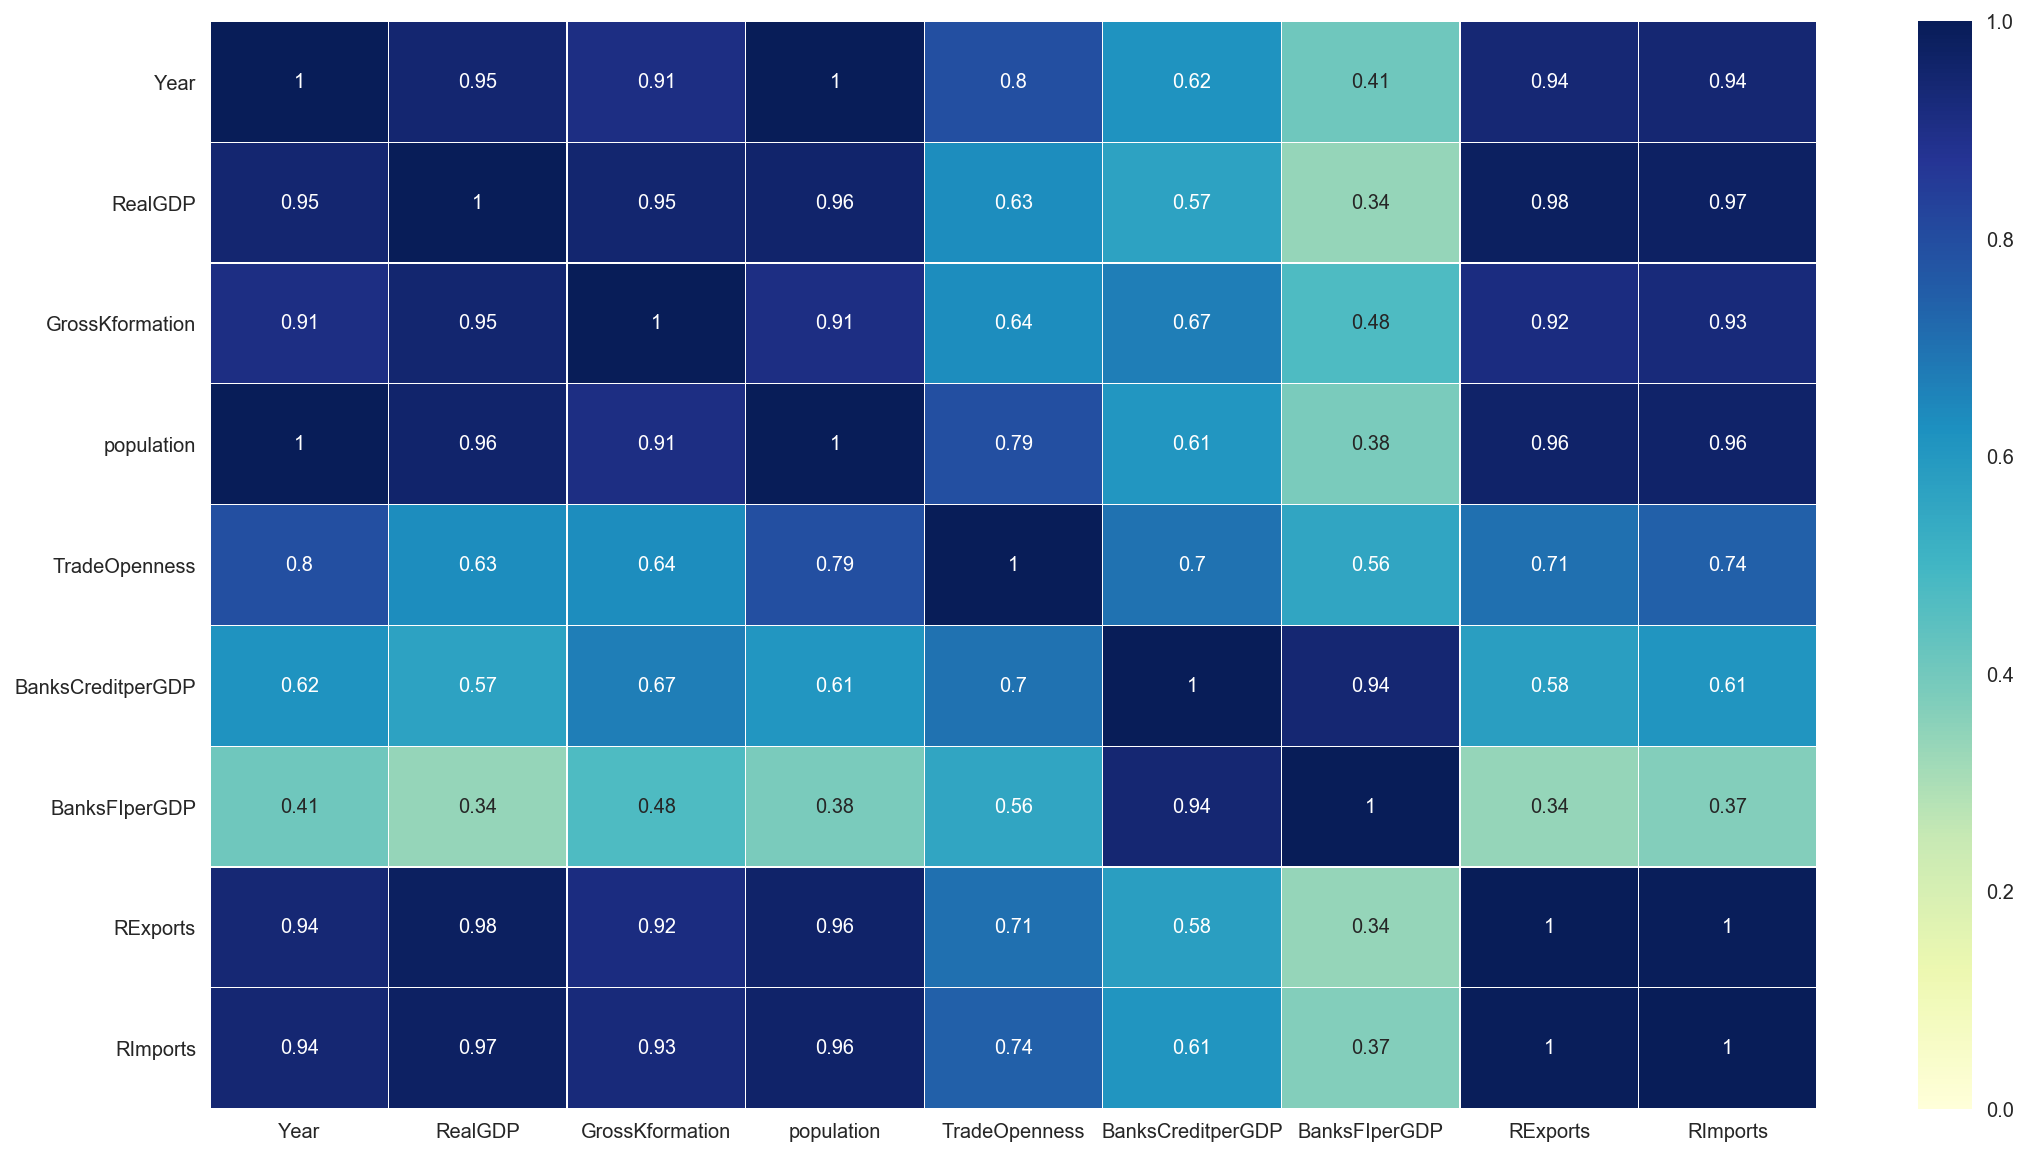

In [46]:
#Correlation matrix and heatmap as defined in the file 1.3-full-analysis.ipynb
fig = plt.figure(figsize=(18,10))
ax = fig.gca()
sns.heatmap(df.corr(), annot=True, linewidths=.15, cmap="YlGnBu", vmin=0, vmax=1, ax=ax)
plt.show()

The goal of the study which will use this dataset is to investigate the relationships between international trade, financial development, and economic growth using time series methods. Here, a correlation matrix is presented as a preliminary descriptive tool. 

It appears that Real GDP is highly correlated to real exports (0.98) and real imports (0.97). This is partly due to trade variables being included in the components of GDP. On the other hand, it appears that real GDP has a weaker correlation with the financial development variables Banks Credit per GDP (0.57) and BanksFI per GDP (0.34). In addition, banks credit per GDP and banksFIperGDP have a weak correlation with real exports and real imports (0.37 to 0.61).

## Functions

The primary graphs in this report involve time series plots due to the nature of the data. Scatter plots will also 
be used to illustrate the relationship between two variables.

In [47]:
#The following function will draw a time series plot for a variable "data". The plot will be assigned a title as well.
def timeseries_plotter(title, data):
    sns.set(rc={"figure.figsize": (10, 7)})
    sns.set_style('white')
    title = 'Time Series Plot of Philippine' + " " + title + " " +'(1960-2014)'
    dist = sns.tsplot(data, time=df.Year)
    dist.set_title(title, fontsize=16)

#The following function will draw a scatter plot for two variables var_x and var_y and assign a title. 
#The additional parameters are used to label the axes.'''
def scatter_plotter(title, var_x, var_y, X_name, Y_name):
    fig = plt.figure(figsize=(10,7))
    ax = fig.gca()
    x, y = pd.Series(var_x, name=X_name), pd.Series(var_y, name=Y_name)
    ax = sns.regplot(x=x, y=y, color='steelblue', ax=ax)
    ax.set_title(title)
    plt.show()
    

In [48]:
#Functions can also be defined to manipulate the variables in the dataset and create new variables.

'''It is useful in economics to express variables in per capita form or variable values per unit of the population.
The following function defines a function that converts series into per capita values.'''
def per_capita(variable):
    datapercap = variable / df.population
    return datapercap

#The following function expresses the sum of two variables.
def sum_of_var(var_x, var_y):
    sums = var_x + var_y
    return sums

#The following function expresses the product of two variables.
def product_of_var(var_x, var_y):
    prod = var_x * var_y
    return prod

#The following function is an general method of expressing trade openness or total trade per GDP.
def real_trade_openness(real_exports, real_imports, real_GDP):
    rto = 100*((real_exports + real_imports) / real_GDP)
    return rto

In [49]:
'''The following functions similarly compute for per capita variables, products of variables, and trade openness, 
but prints out each value beside its corresponding year on one line at a time'''
def per_capita_table(variable):
    datapercap = variable / df.population
    year = df.Year
    for i in range(len(df.Year)):
        print year[i], datapercap[i]

def sum_of_var_table(var_x, var_y):
    sums = var_x + var_y
    year = df.Year
    for i in range(len(df.Year)):
        print year[i], sums[i]
        
def product_of_var_table(var_x, var_y):
    prod = var_x * var_y
    year = df.Year
    for i in range(len(df.Year)):
        print year[i], prod[i]

def real_trade_openness_table(real_exports, real_imports, real_GDP):
    rto = 100*((real_exports + real_imports) / real_GDP)
    year = df.Year
    for i in range(len(df.Year)):
        print year[i], rto[i]

## Analysis

In this section, the analysis and choice of variables will be primarily done using the framework of Rahman, Shahbaz and Farooq (2015), who begin with a Cobb-Douglas Production Function 
\begin{equation}
Y = A K^{\alpha} L^{\beta}
\end{equation}
    
    where 
        Y is output
        A is exogenous technological progress
        K is capital stock
        L is labor or population

Rahman, Shahbaz and Farooq (2015) express technological progress as
\begin{equation}
A = \phi T^{\sigma} F^{\delta}
\end{equation}

    where 
        A is technological progress
        T is a trade indicator (e.g. exports, imports)
        F is a financial development indicator (e.g. private credit by banks and other financial institutions)
 
By substitution, output can be expressed as 
\begin{equation}
Y = \phi T^{\sigma} F^{\delta} K^{\alpha} L^{\beta}
\end{equation}

The impact of labor on output can be held constant by expressing the other variables in per capita terms as needed. This justifies the use of the per_capita Python function defined above. 

### Time Series Plots
We begin by graphing key variables one at a time and making observations based on a visual inspection of these graphs.

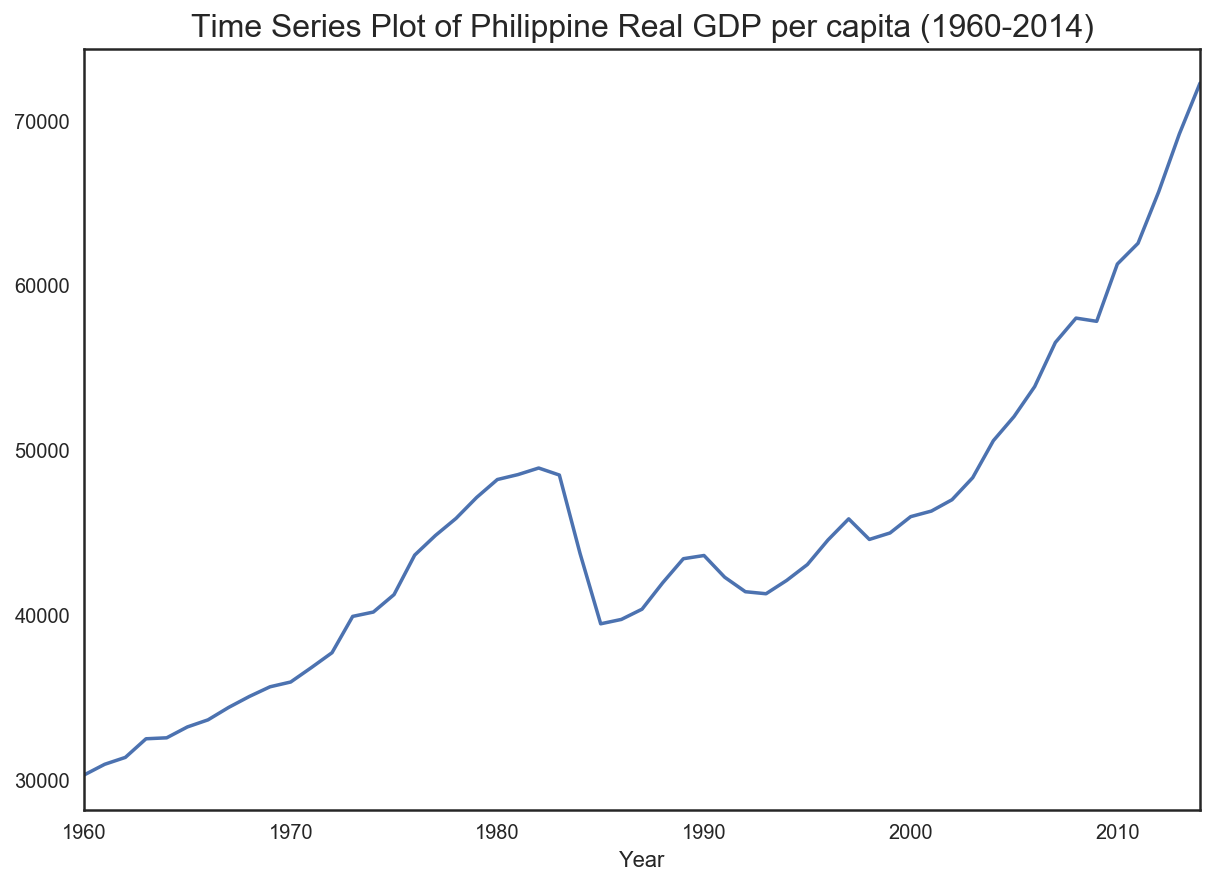

In [50]:
rGDP_pc = per_capita(df.RealGDP)
timeseries_plotter("Real GDP per capita", rGDP_pc)

Philippine real GDP per capita appears to be on an uptrend for much of the period from 1960 to 2014. The period around 1983 to 1985 is a notable exception. Around this period during the regime of former president Ferdinand Marcos, the Philippines experienced economic and political crises. One of Marcos' well-known critics, former senator Benigno Aquino, Jr. was also assassinated around this time.

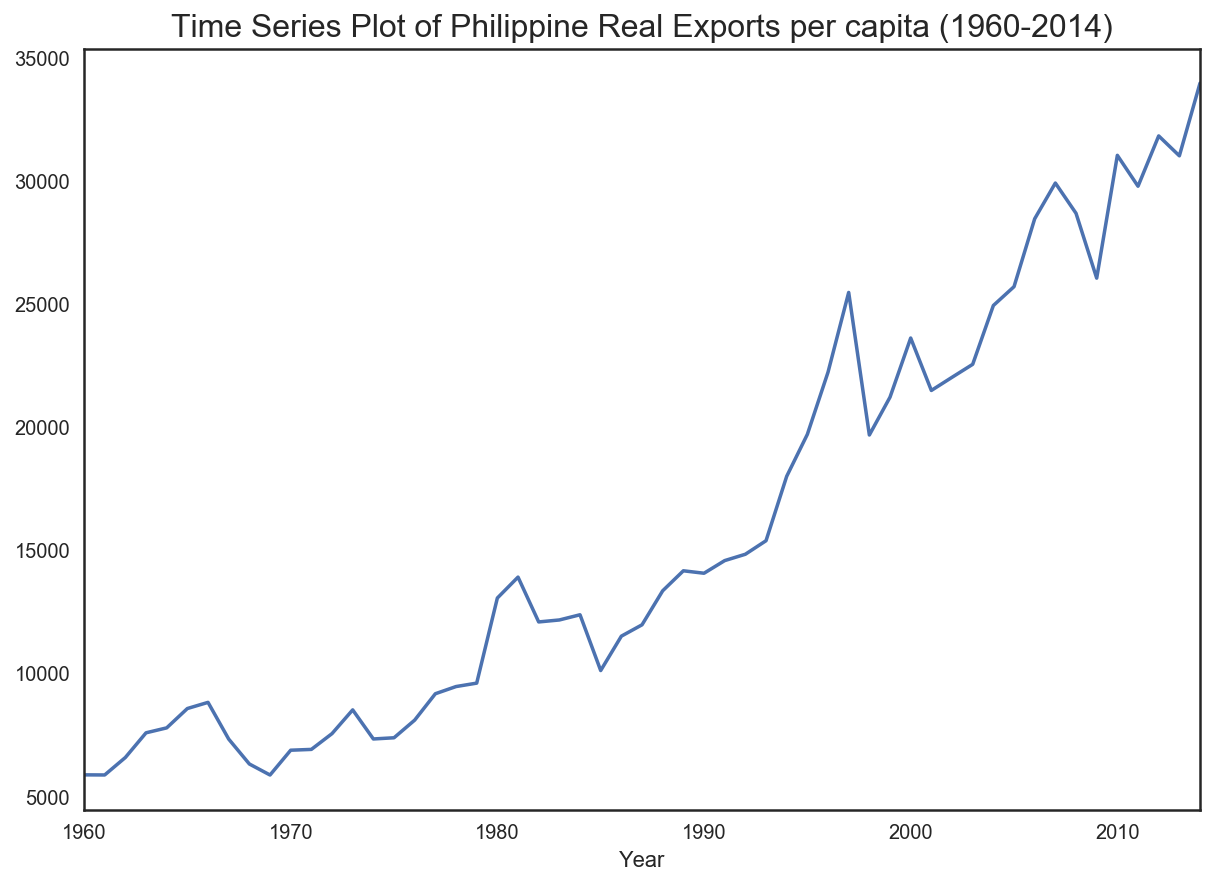

In [51]:
exports = per_capita(df.RExports)
timeseries_plotter("Real Exports per capita", exports)

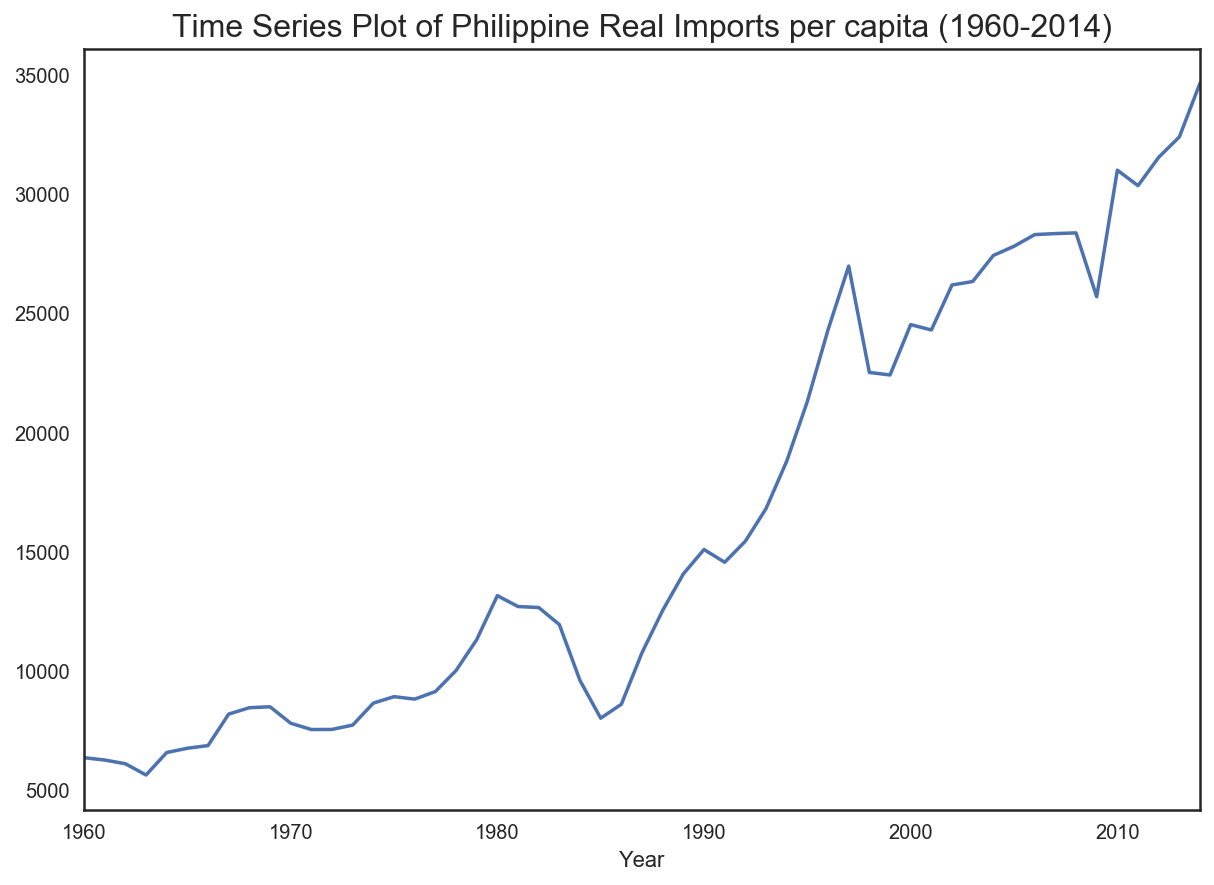

In [52]:
imports = per_capita(df.RImports)
timeseries_plotter("Real Imports per capita", imports)

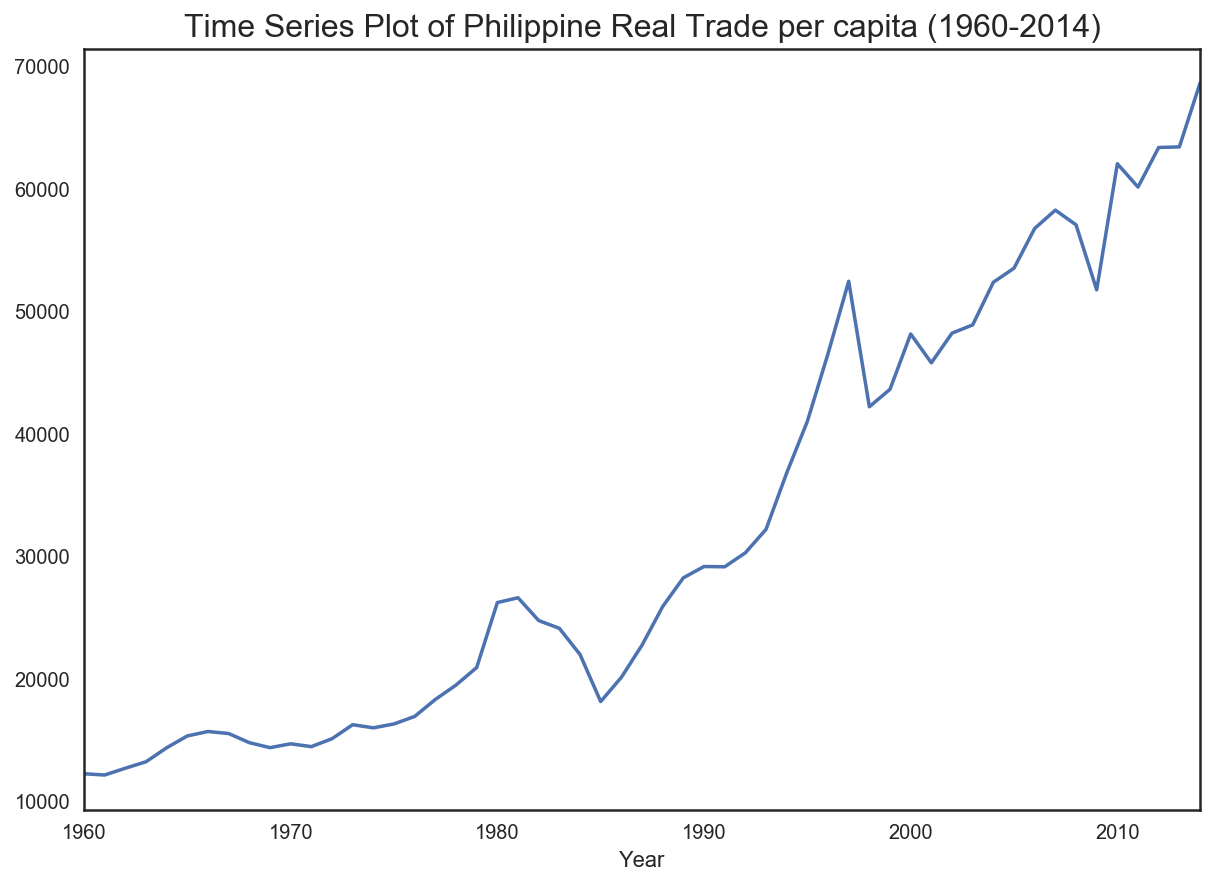

In [53]:
#totaltrade = exports + imports
totaltrade = per_capita(sum_of_var(df.RExports, df.RImports))
timeseries_plotter("Real Trade per capita", totaltrade)

International trade volume can be expressed in three ways (exports, imports, and total trade). Based on the three graphs above, it can be noted that Philippine trade generally increased in the long-run period from 1960 to 2014 but some volatility is present. Trade was also affected during the political and economic crisis of the 1980's. In addition, the volatility in trading activity can be seen during the financial crisis periods. During the 1990's, the Fidel Ramos administration implemented a series of trade liberalization initiatives which increased Philippine trade during that period until the Asian Financial Crisis around 1998. A significant drop in Philippine trade followed the crisis. Trade recovered and increased again during the administration of Gloria Macapagal-Arroyo. However, in the later years of the Arroyo presidency, the 2008 global financial crisis caused Philippine trade to drop.

International trade can also be expressed in terms of how open a country is to liberalization. This is usually done using the ratio of total trade volume to GDP. Even if a trade openness variable is available, note that we can also come up with a variable of trade openness using the exports, imports, and real GDP variables in our dataset. Any discrepancy between the trade openness variable in the dataset and our Python function of real_trade_openness depends on which trade and GDP variables were used by the World Bank. It can be noted below that the Philippine economy sharply became open to trade during the 1990's (again due to the Ramos administration).

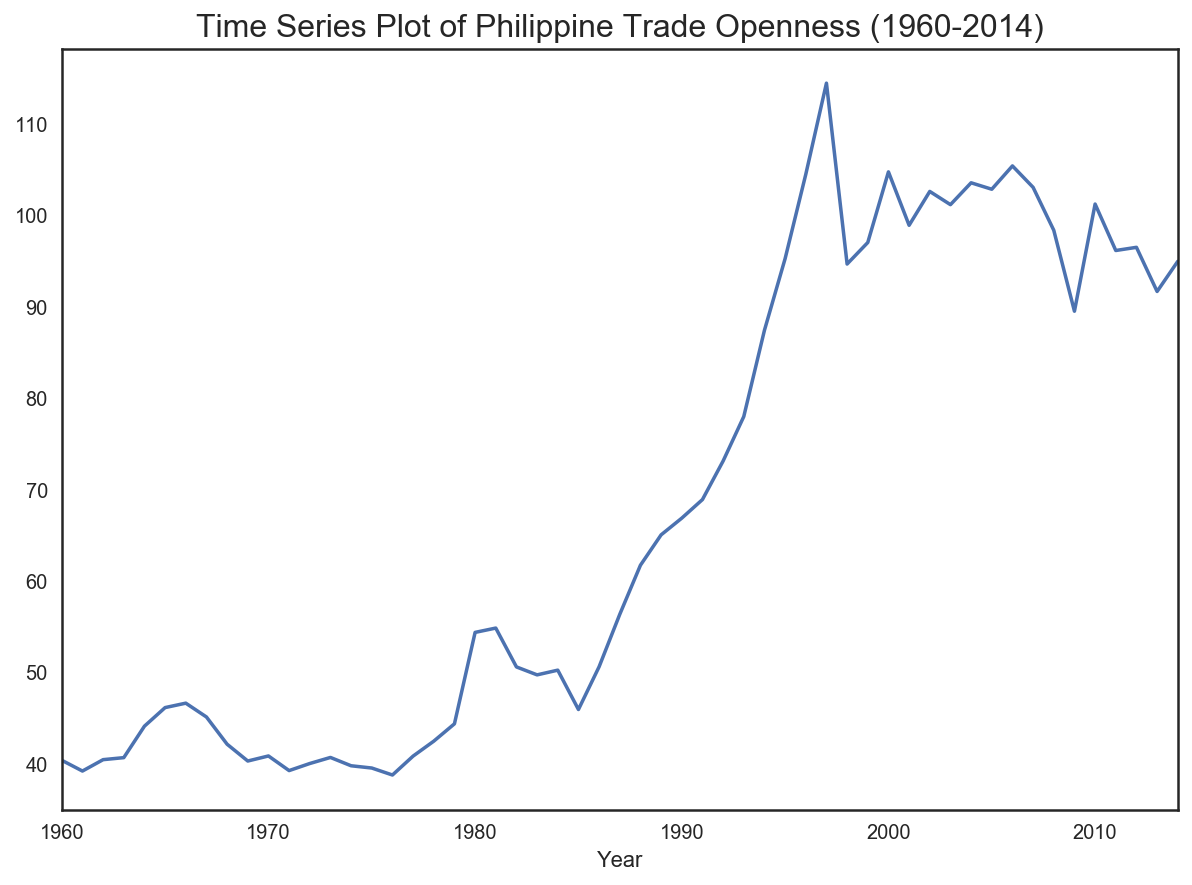

In [54]:
openness = real_trade_openness(df.RExports, df.RImports, df.RealGDP)
timeseries_plotter("Trade Openness", openness)

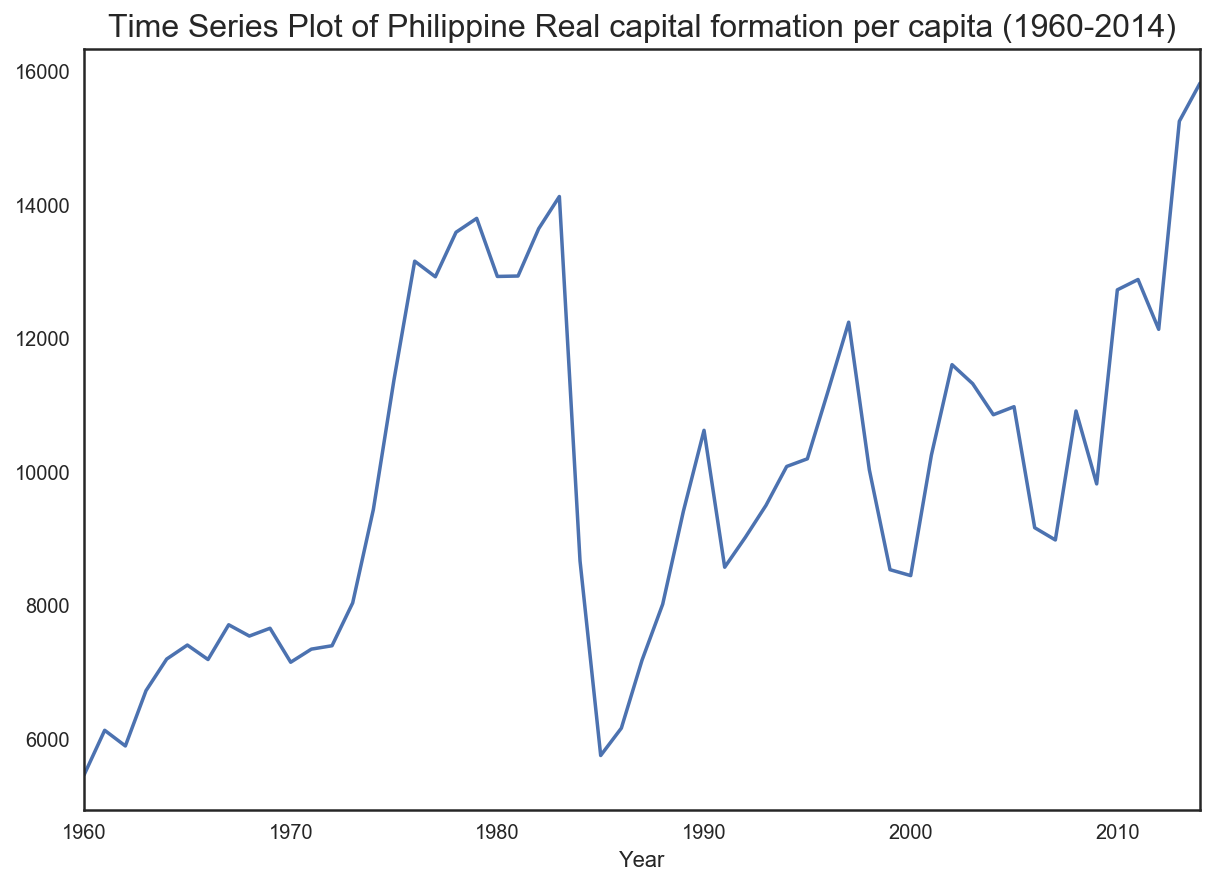

In [55]:
GrossKformation = per_capita(df.GrossKformation)
timeseries_plotter("Real capital formation per capita", GrossKformation)

Based on the graph of real capital formation above, it appears to be the more volatile variable when compared to real GDP and international trade. It similarly decreased during periods of political uncertainty as seen in the 1980's or financial crises such as the 1998 Asian crisis and 2008 US & global financial crisis. It can also be observed that there was a sharp increase in capital stock during the 1970's. On the government side, most major projects of Ferdinand Marcos during that period involved borrowing debt to build many infrastructures. Although the Martial Law era was controversial for its human rights record, some private investors may have also perceived a sense of "order" during this period and as a result, made major capital investments during that period. This increase in capital would not last into the 1980's, when a political crisis and recession occurred and reversed the gains in capital formation during the 1970's.

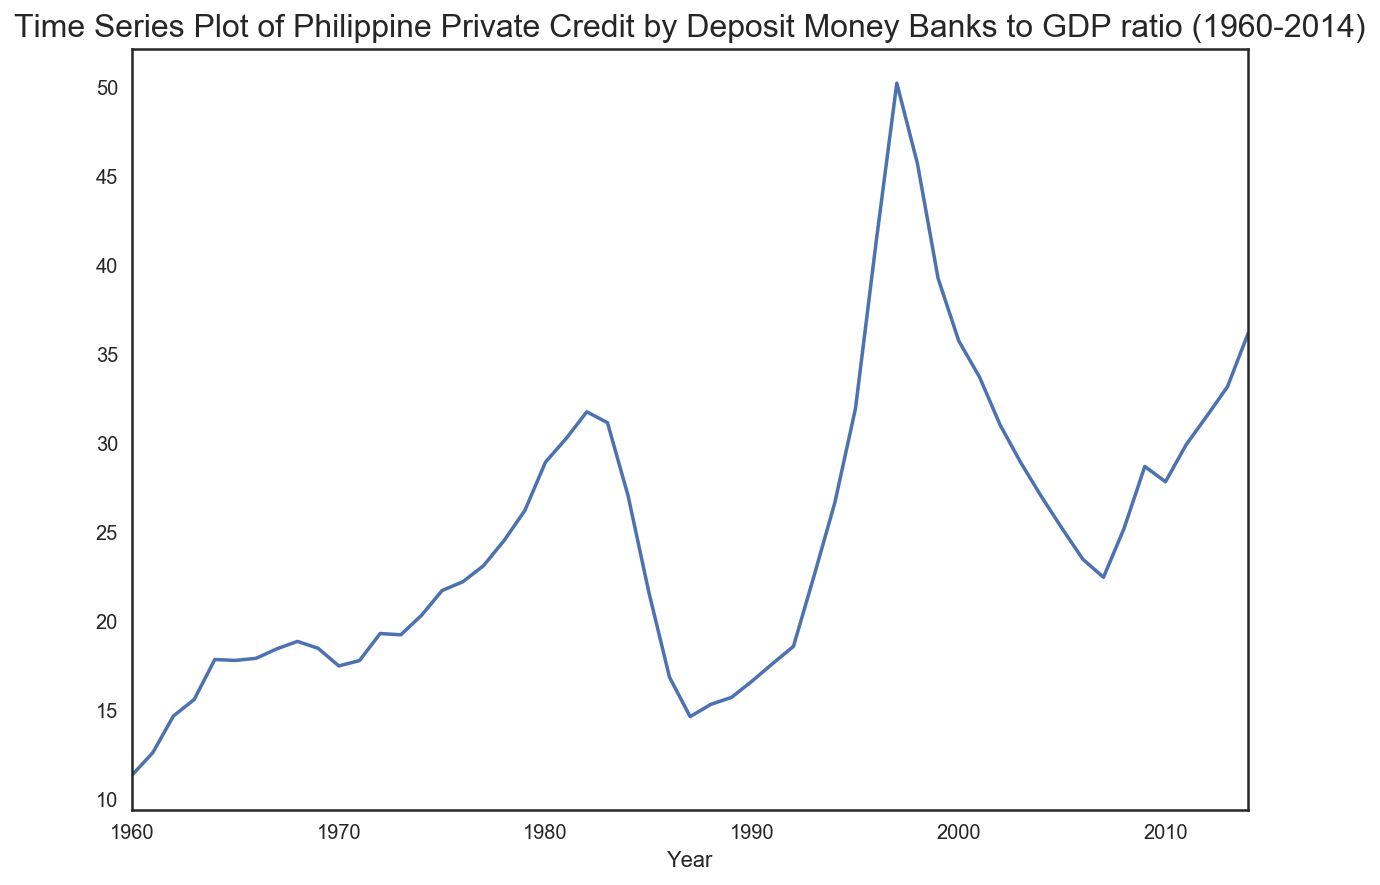

In [56]:
financialdevelopment = df.BanksCreditperGDP
timeseries_plotter("Private Credit by Deposit Money Banks to GDP ratio", financialdevelopment)

Unlike the other variables in the dataset, the available financial development variables are expressed as a ratio of a financial development indicator to GDP. In the graph above, focus was on the Credit by Banks to the Private Sector to GDP ratio. Three observations can be noted. First, the variable again decreased sharply during the 1980's period. Second, the size of credit by banks to the private sector increased relative to GDP during the 1990's. This could be due to the liberalization initiatives of the Ramos administration as well. Third, the ratio dropped sharply again following the 1998 financial crisis.

An alternative estimate of a financial development variable can be created using the product of Private Credit to GDP ratio and Real GDP per capita. Theoretically,
\begin{equation}
Private Credit to GDP = \frac{Private Credit}{GDP}
\end{equation}
and
\begin{equation}
Real GDP per capita = \frac{Real GDP}{population}
\end{equation}
If the denominator of private credit to GDP and numerator of GDP per capita were similar, the two variables can be multiplied to obtain an estimate of private credit per capita.

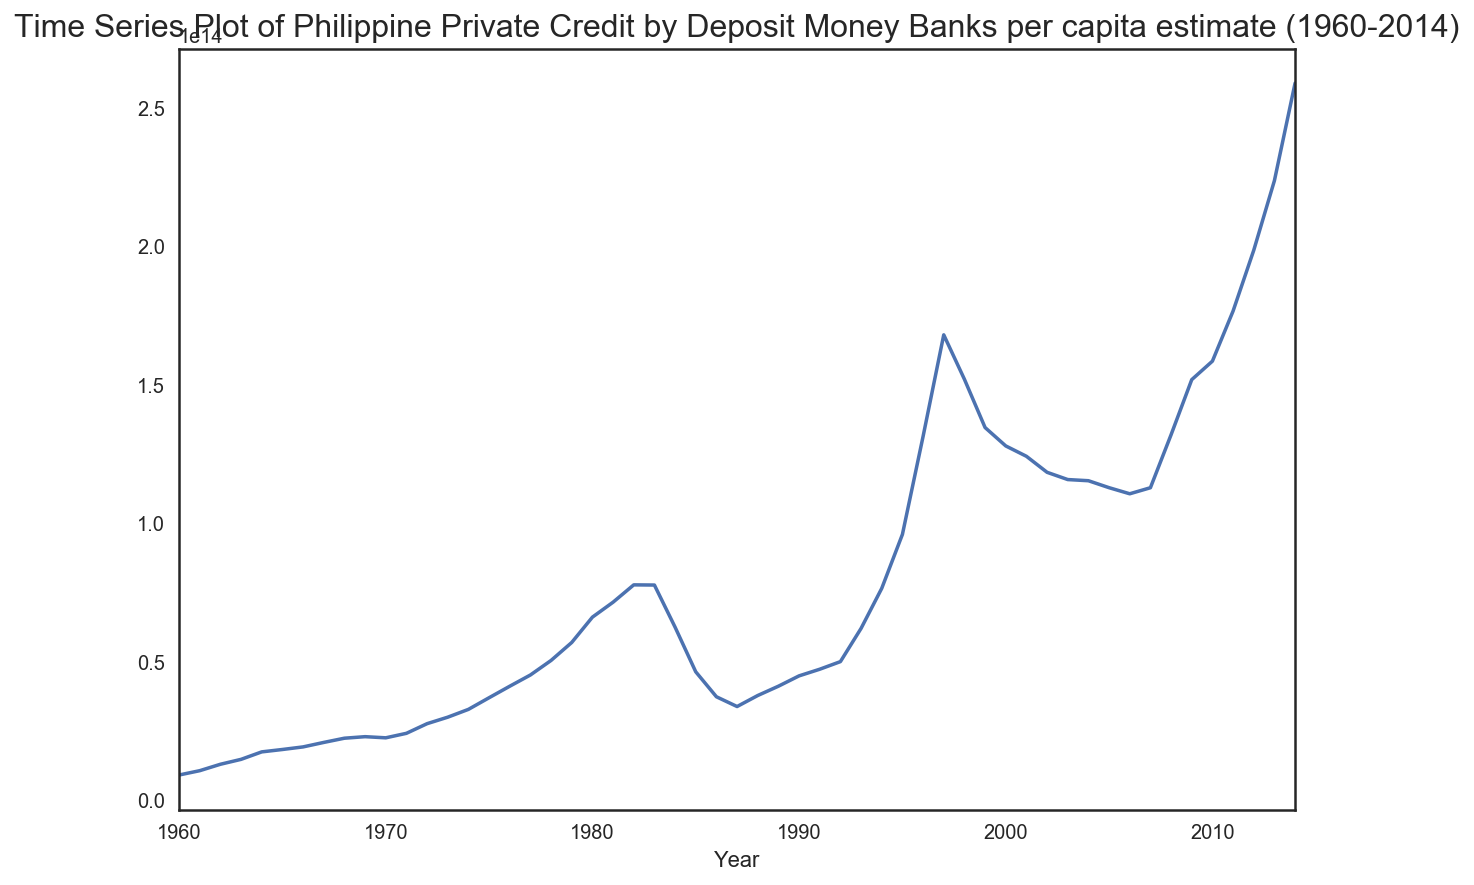

In [57]:
findevpercapita = product_of_var(df.BanksCreditperGDP, df.RealGDP)
timeseries_plotter("Private Credit by Deposit Money Banks per capita estimate", findevpercapita)

### Scatter Plots
In this section, we further attempt to describe the variables by looking for relationships using scatter plots. The concept of stationarity of time series is ignored in this section. Focus will be on the primary research questions of the study:
    
    1.) The Relationship between International Trade and Economic Growth
    2.) The Relationship between Financial Development and Economic Growth
    3.) The Relationship between International Trade and Financial Development
    

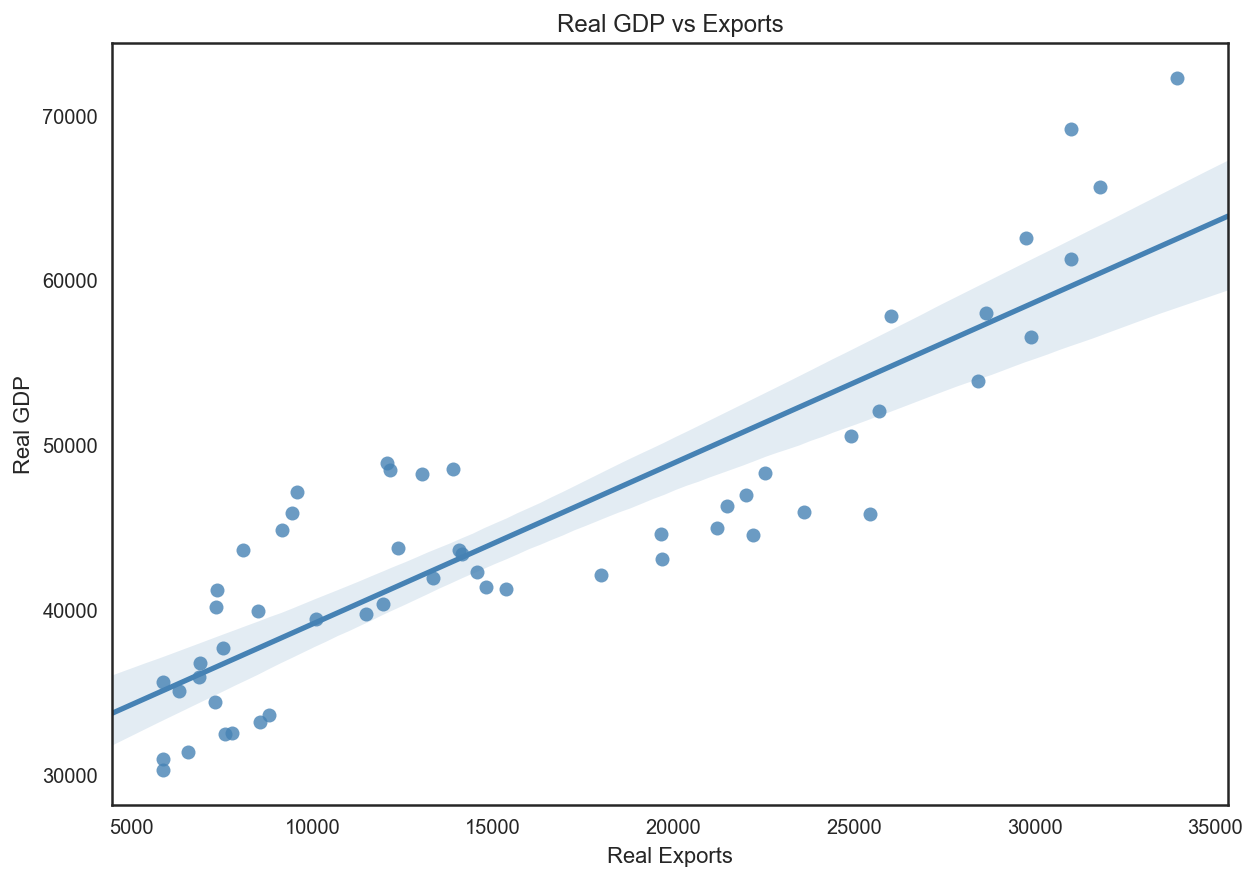

In [58]:
scatter_plotter("Real GDP vs Exports", 
                per_capita(df.RExports), per_capita(df.RealGDP), "Real Exports", "Real GDP")

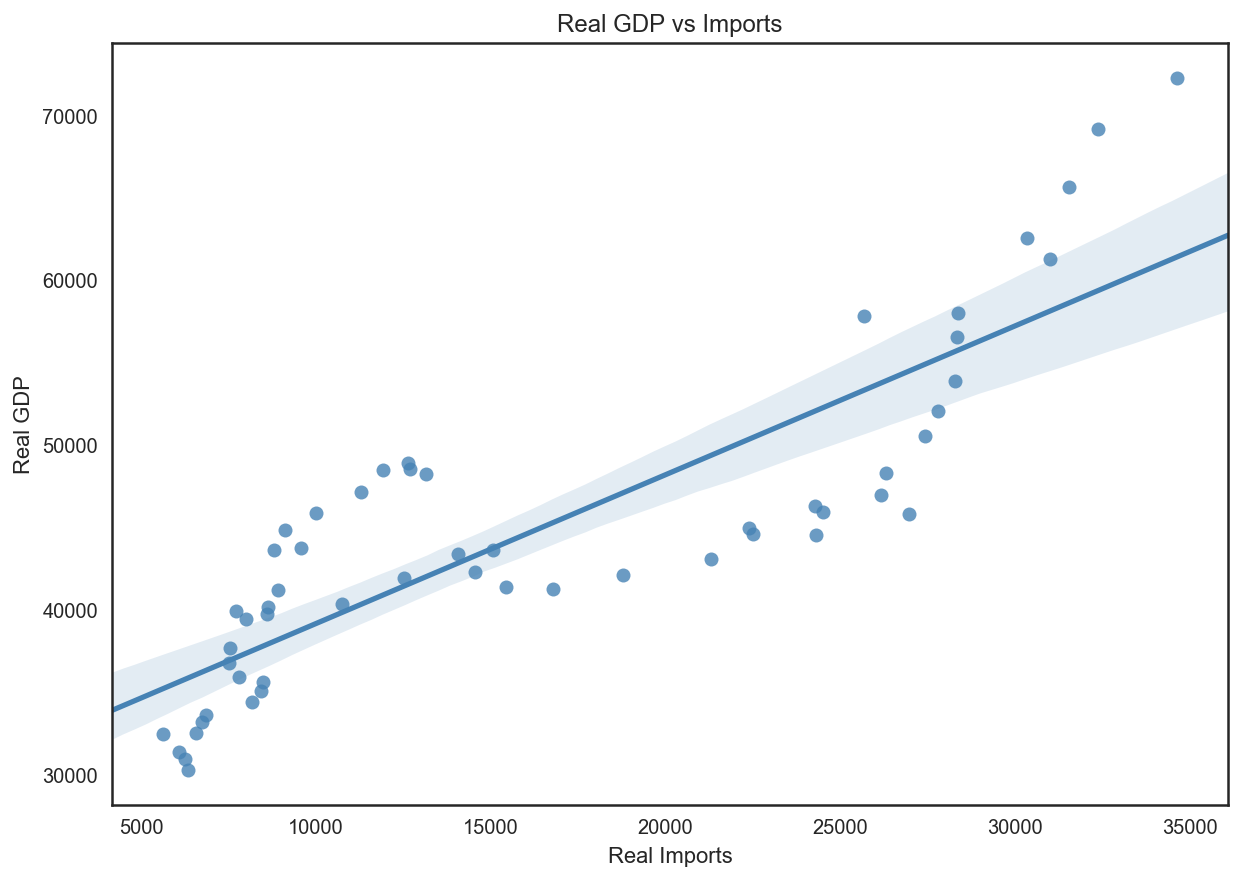

In [59]:
scatter_plotter("Real GDP vs Imports", 
                per_capita(df.RImports), per_capita(df.RealGDP), "Real Imports", "Real GDP")

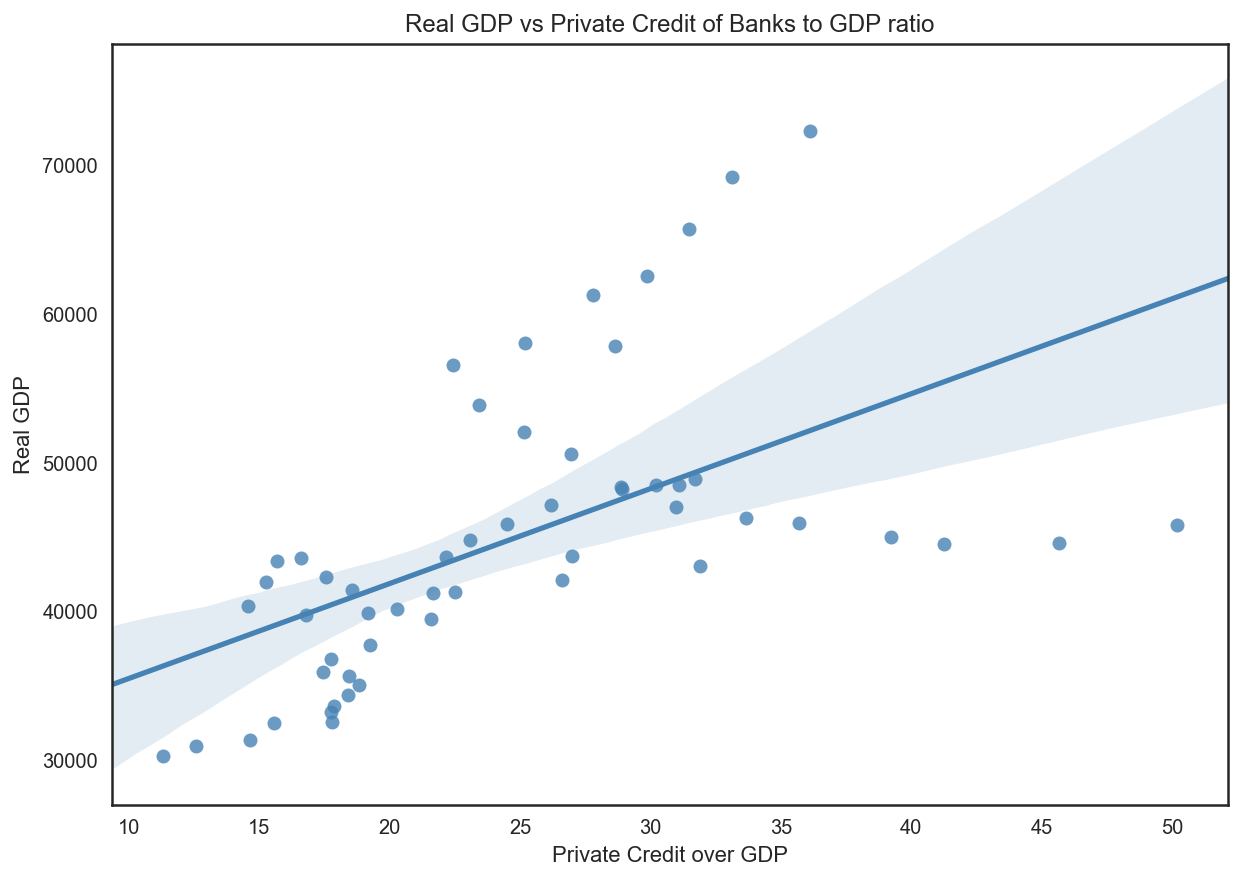

In [60]:
scatter_plotter("Real GDP vs Private Credit of Banks to GDP ratio", 
                df.BanksCreditperGDP, per_capita(df.RealGDP), "Private Credit over GDP", "Real GDP")

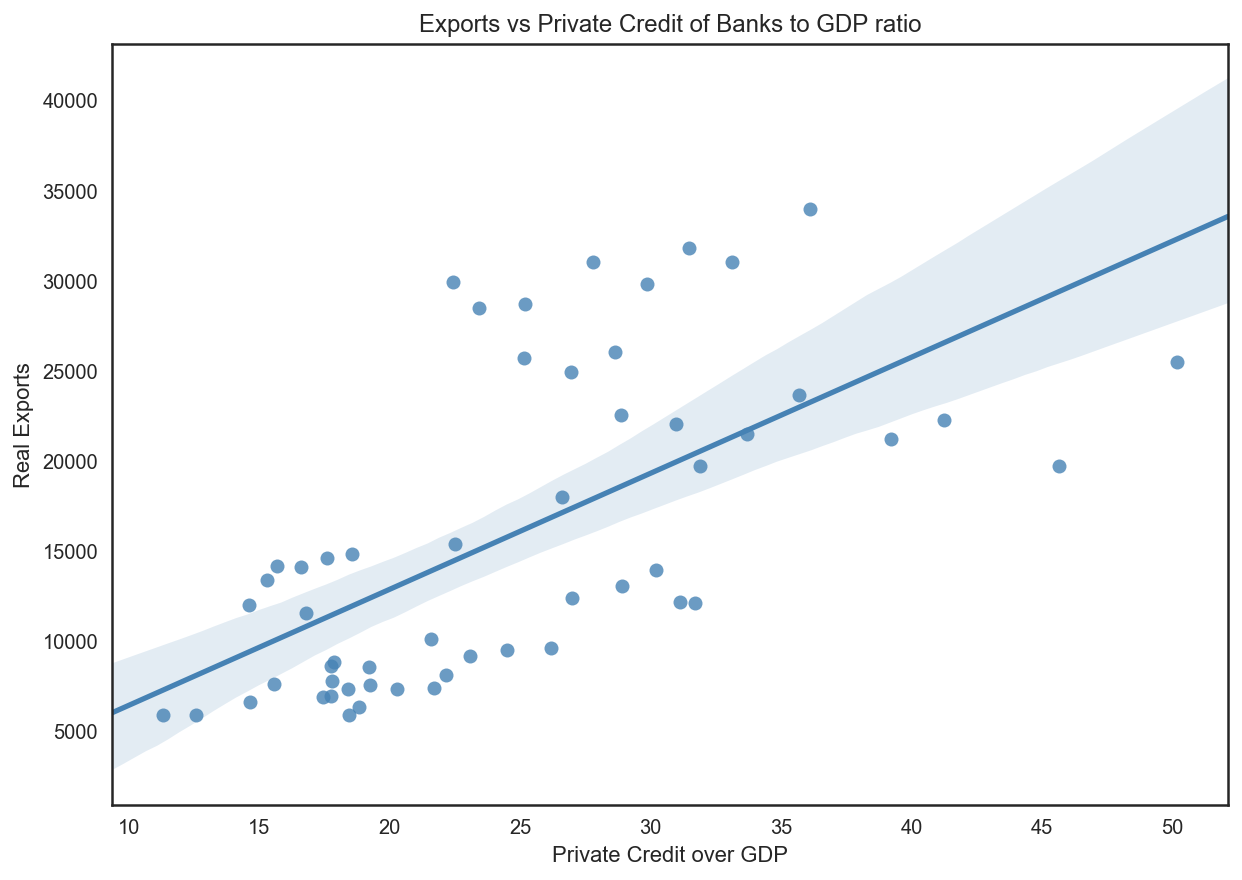

In [61]:
scatter_plotter("Exports vs Private Credit of Banks to GDP ratio", 
                df.BanksCreditperGDP, per_capita(df.RExports), "Private Credit over GDP", "Real Exports")

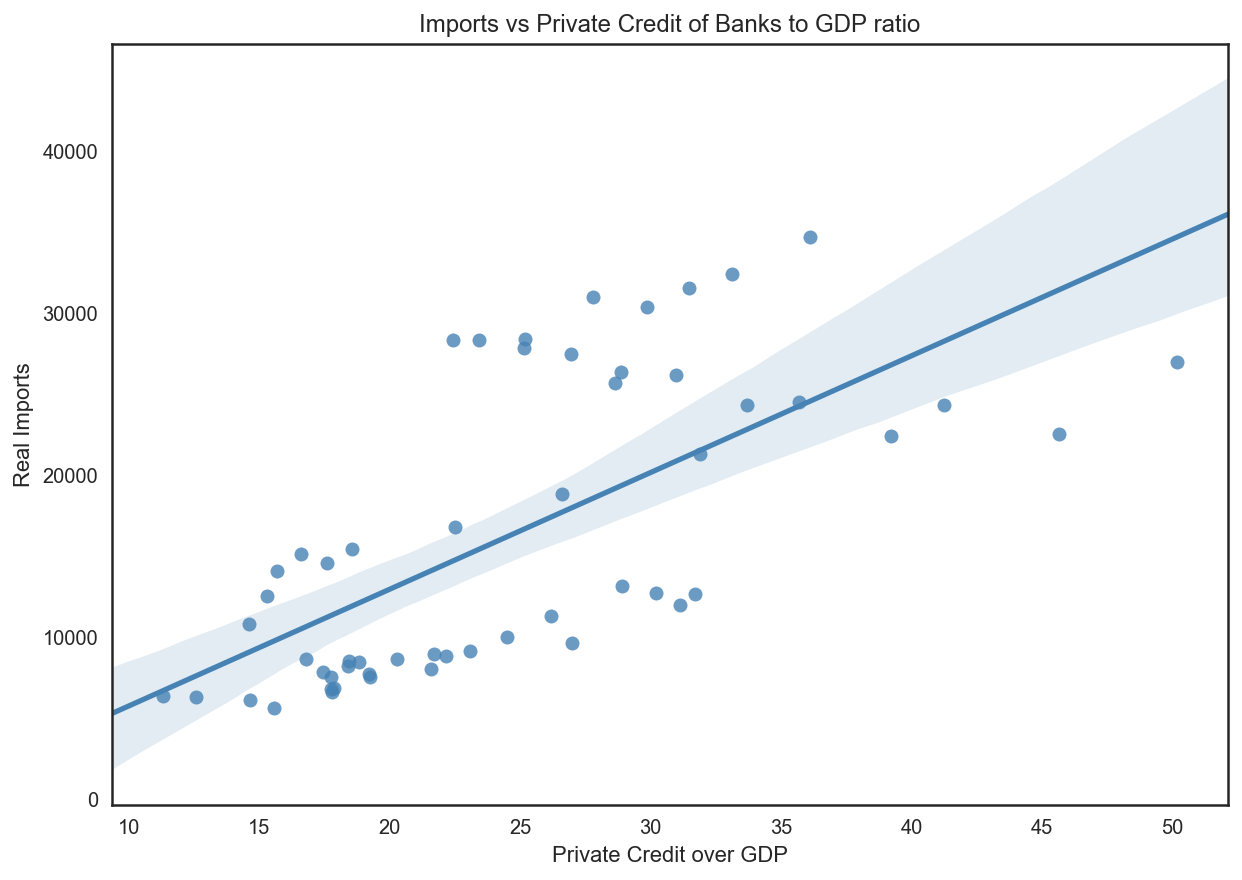

In [62]:
scatter_plotter("Imports vs Private Credit of Banks to GDP ratio", 
                df.BanksCreditperGDP, per_capita(df.RImports), "Private Credit over GDP", "Real Imports")

In all scatter plots above, it appears that each variable indicated has a positive relationship with the other variables. However, a more accurate analysis of the relationships between each variable in this case involves time series econometric methods.

## Summary

In this report, variables mostly involving international trade, financial development, and economic growth in the Philippine context were loaded using Python and visually described. We can note the following observations:

    1.) Philippine economic variables such as growth are mostly on an uptrend when examined from a long-term perspective.
    2.) The 1980's economic and political crisis in the Philippines is a major turning point in the country's history. Therefore, it is not surprising to see that it affected many variables.
    3.) The 1998 and 2008 financial crises also affected the local Philippine and global economy.
    4.) Philippine economic performance is affected by policies of whoever is the incumbent administration.
    5.) Since our data is time-series in nature, a more accurate description requires econometric methods to account for concepts such as stationarity.

## References

    1.) Carrillo, Mario Javier and Justin Malunay. 2017. ECON628-01 Course Lecture Notes.
    2.) Rahman, Mohammad M., Muhammad Shahbaz and Abdul Farooq. 2015. Financial Development, International Trade, and Economic Growth in Australia: New Evidence From Multivariable Framework Analysis. Journal of Asia-Pacific Business 16: 21-43.
    3.) Saplala, Dino Carlo A. 2016. The Relationship between International Trade, Financial Development, and Economic Growth. ECON 232 Research Paper. Ateneo de Manila University.


In [63]:
#Appendix: Full Dataset

df

,Year,RealGDP,GrossKformation,population,TradeOpenness,BanksCreditperGDP,BanksFIperGDP,RExports,RImports
0,1960,7.950509e+11,1.432058e+11,26273023.0,23.42,11.31,15.10,1.541045e+11,1.665821e+11
1,1961,8.397056e+11,1.662639e+11,27164618.0,26.62,12.57,16.86,1.592028e+11,1.695945e+11
2,1962,8.797857e+11,1.652893e+11,28081234.0,36.18,14.63,19.63,1.845027e+11,1.709515e+11
3,1963,9.419029e+11,1.948569e+11,29016770.0,35.57,15.55,20.39,2.197275e+11,1.629068e+11
4,1964,9.743701e+11,2.153922e+11,29962877.0,36.68,17.80,22.90,2.329048e+11,1.964738e+11
5,1965,1.025679e+12,2.287121e+11,30913931.0,38.34,17.75,22.92,2.645696e+11,2.082771e+11
6,1966,1.071075e+12,2.288604e+11,31867565.0,38.75,17.87,23.15,2.807036e+11,2.182653e+11
7,1967,1.128101e+12,2.528363e+11,32826602.0,40.57,18.40,23.99,2.402247e+11,2.682444e+11
8,1968,1.183890e+12,2.546007e+11,33797041.0,36.39,18.82,25.04,2.131388e+11,2.851945e+11
9,1969,1.239016e+12,2.661343e+11,34787588.0,32.50,18.43,25.28,2.038212e+11,2.949259e+11
